In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


# Backpropagation

In [ ]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and compute the loss
y_hat = w*x
loss = (y_hat - y)**2

print(loss)

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Gradient Descent

In [ ]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)
w = 0.0

def forward(x): return w * x
def loss(y, y_pred): return ((y_pred - y)**2).mean()
def gradient(x, y, y_pred):  # dJ/dw
    N = x.shape[0]
    return (2.0/N) * np.sum(x * (y_pred - y))

print(f'Prediction before training: f(5) = {forward(5):.3f}')

lr = 0.01
n_iters = 50
for epoch in range(n_iters):
    y_pred = forward(X)         # <-- X, not x
    l = loss(Y, y_pred)
    dw = gradient(X, Y, y_pred)
    w -= lr * dw
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 10: w = 1.606, loss = 1.60939169
epoch 20: w = 1.922, loss = 0.06237914
epoch 30: w = 1.985, loss = 0.00241778
epoch 40: w = 1.997, loss = 0.00009371
epoch 50: w = 1.999, loss = 0.00000363
Prediction after training: f(5) = 9.997


In [ ]:
import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x): return w * x
def loss(y, y_pred): return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(torch.tensor(5.0)).item():.3f}')

lr = 0.01
n_iters = 100
for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()                     # computes w.grad
    with torch.no_grad():
        w -= lr * w.grad             # use w.grad, not dw
    w.grad.zero_()
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(torch.tensor(5.0)).item():.3f}')


Prediction before training: f(5) = 0.000
epoch 10: w = 1.606, loss = 1.60939169
epoch 20: w = 1.922, loss = 0.06237914
epoch 30: w = 1.985, loss = 0.00241778
epoch 40: w = 1.997, loss = 0.00009371
epoch 50: w = 1.999, loss = 0.00000363
epoch 60: w = 2.000, loss = 0.00000014
epoch 70: w = 2.000, loss = 0.00000001
epoch 80: w = 2.000, loss = 0.00000000
epoch 90: w = 2.000, loss = 0.00000000
epoch 100: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [ ]:
import torch
import torch.nn as nn

X = torch.tensor([[1.0],[2.0],[3.0],[4.0]])
Y = torch.tensor([[2.0],[4.0],[6.0],[8.0]])
X_test = torch.tensor([[5.0]])

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

n_iters = 200
for epoch in range(n_iters):
    y_pred = model(X)
    l = criterion(y_pred, Y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        w_param = list(model.parameters())[0].item()
        b_param = list(model.parameters())[1].item()
        print(f'epoch {epoch+1}: w = {w_param:.3f}, b = {b_param:.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


Prediction before training: f(5) = -3.197
epoch 20: w = 1.574, b = 1.056, loss = 0.24322364
epoch 40: w = 1.654, b = 1.014, loss = 0.17281429
epoch 60: w = 1.675, b = 0.955, loss = 0.15325370
epoch 80: w = 1.694, b = 0.899, loss = 0.13593249
epoch 100: w = 1.712, b = 0.847, loss = 0.12056898
epoch 120: w = 1.729, b = 0.798, loss = 0.10694209
epoch 140: w = 1.744, b = 0.751, loss = 0.09485514
epoch 160: w = 1.759, b = 0.708, loss = 0.08413444
epoch 180: w = 1.773, b = 0.666, loss = 0.07462531
epoch 200: w = 1.787, b = 0.628, loss = 0.06619096
Prediction after training: f(5) = 9.560


# Linear Regression

In [ ]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

epoch: 10, loss = 4451.7905
epoch: 20, loss = 3321.4250
epoch: 30, loss = 2503.1023
epoch: 40, loss = 1910.0726
epoch: 50, loss = 1479.9017
epoch: 60, loss = 1167.5914
epoch: 70, loss = 940.6657
epoch: 80, loss = 775.6576
epoch: 90, loss = 655.5903
epoch: 100, loss = 568.1692


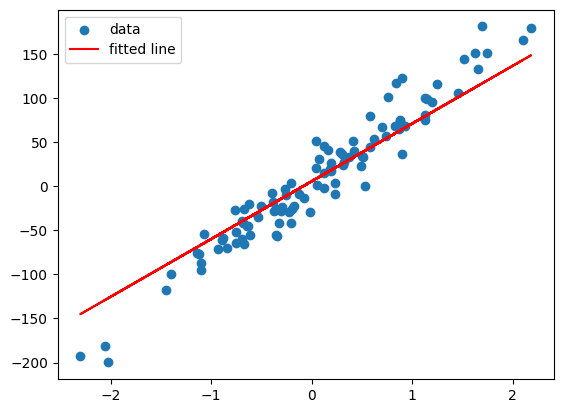

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1
)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(-1, 1)  # reshape to (100, 1) for nn.Linear

n_samples, n_features = X.shape

# 1) model
model = nn.Linear(n_features, 1)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.scatter(X_numpy, y_numpy, label='data')
plt.plot(X_numpy, predicted, color='red', label='fitted line')
plt.legend()
plt.show()


# Logistic Regression